In [2]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
connection = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=PIRALOS\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;')

In [ ]:
query1 = """SELECT 
    st.CountryRegionCode AS Country,
    SUM(soh.SubTotal) AS TotalSales
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN 
    Sales.SalesTerritory st ON c.TerritoryID = st.TerritoryID
GROUP BY 
    st.CountryRegionCode
ORDER BY 
    SUM(soh.SubTotal) DESC;"""

In [5]:
df1 = pd.read_sql(query1, connection)

C:\Users\rache\AppData\Local\Temp\ipykernel_2288\2891182226.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, connection)


In [6]:
query2 = """SELECT 
    st.Name AS Region,
    SUM(soh.SubTotal) AS TotalSales
FROM 
    Sales.SalesOrderHeader soh
JOIN 
    Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN 
    Sales.SalesTerritory st ON c.TerritoryID = st.TerritoryID
WHERE CountryRegionCode = 'US'
GROUP BY 
    st.Name
ORDER BY 
    SUM(soh.SubTotal) DESC;"""

In [7]:
df2 = pd.read_sql(query2, connection)

C:\Users\rache\AppData\Local\Temp\ipykernel_2288\2424319725.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, connection)


In [8]:
df2.head()
df2['SalesMillions']=df2['TotalSales']/1000000

In [9]:
df1.head()
df1['SalesMillions']=df1['TotalSales']/1000000

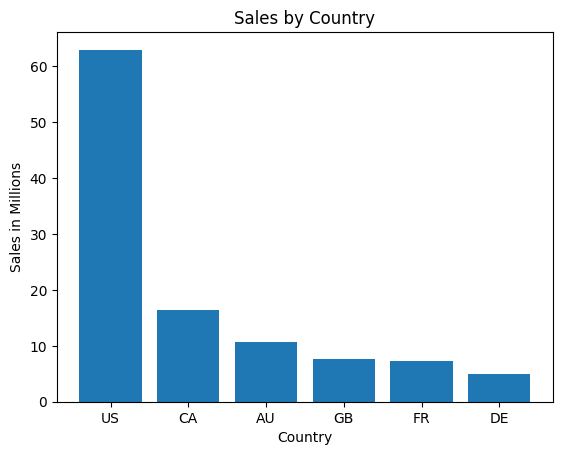

In [10]:
plt.bar(x=df1['Country'], height=df1['SalesMillions'])
plt.xlabel('Country')
plt.ylabel('Sales in Millions')
plt.title("Sales by Country")
plt.show()

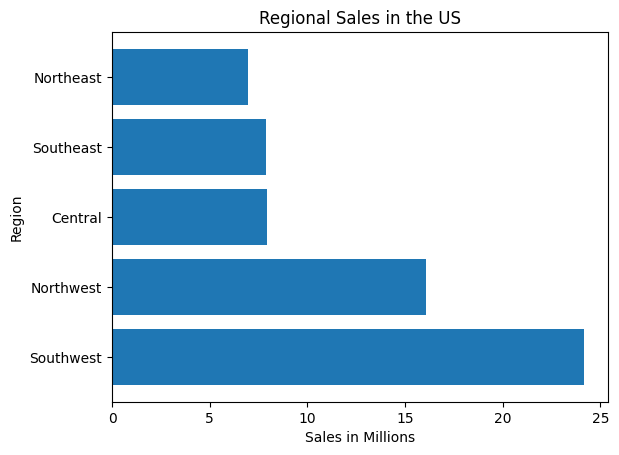

In [11]:
plt.barh(y=df2['Region'], width=df2['SalesMillions'])
plt.xlabel('Sales in Millions')
plt.ylabel('Region')
plt.title("Regional Sales in the US")
plt.show()